In [1]:
import load_bgi as ld
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def to_mouse_gene(gene_name_list):
    return [gene_name[0] + gene_name[1:].lower() for gene_name in gene_name_list]
mag_sig = ["MKI67", "EPCAM", "TOP2A", "ASCL2", "CBX3", "HSP90AB1", "ZFAS1", "PABPC1",
           "GTF3A", "NAP1L1", "TGFBI", "IFITM3", "HSPD1", "NONO", "HSPH1", "NKD1", "LY6E",
           "C6orf48", "SSB", "RSL1D1", "DPEP1", "DKC1", "BMP4", "GNG4", "CPNE1", "ZDHHC9",
           "DARS", "SCD", "MYC", "PHLDA1", "DACH1", "CLDN1", "KRT23"]
mag_sig = to_mouse_gene(mag_sig)

In [3]:
df = pd.read_csv("../20240802-Tumor/RNA/B03502E5.cut.combined.offset.tissue.gem", comment='#', sep='\t')
df.head()

,geneID,x,y,MIDCount,ExonCount
0,AC168977.1,9450,16304,1,0
1,AC168977.1,13533,13706,1,0
2,AC168977.1,13818,7595,1,1
3,AC168977.1,12328,17883,2,2
4,Spry3,5288,17584,1,1


In [4]:
mag_df = df.loc[np.isin(df.geneID, mag_sig), :]

In [5]:
gem_path = "/home/wpy/stereoseq/in_vivo_tumor/B03502E5/out/B03502E5-1/04.output/B03502E5.gem"
gem_df = pd.read_csv(gem_path, comment='#', sep='\t')
gem_df.head()

,geneID,x,y,MIDCount,ExonCount
0,sgNon-targeting_42_gene,4696,13904,1,1
1,sgNon-targeting_42_gene,7769,13324,1,1
2,sgNon-targeting_42_gene,6907,16342,1,1
3,sgNon-targeting_42_gene,6237,17557,1,1
4,sgNon-targeting_42_gene,13369,7839,1,1


In [6]:
call_path = "./calling/02.count/B03502E5.gem"
call_df = pd.read_csv(call_path, comment='#', sep='\t')
call_df.head()

,geneID,x,y,MIDCount,ExonCount
0,sgrna_gene,0,14611,4,4
1,sgrna_gene,333,10637,1,1
2,sgrna_gene,462,6480,2,2
3,sgrna_gene,533,9870,1,1
4,sgrna_gene,598,12715,1,1


In [7]:
mag_offset = [0, 0]
guide_offset = [1057, 766]
call_offset = [1662, 2577]

mag_df[['x', 'y']] = mag_df[['x', 'y']] + mag_offset
gem_df[['x', 'y']] = gem_df[['x', 'y']] + guide_offset
call_df[['x', 'y']] = call_df[['x', 'y']] + call_offset

/tmp/ipykernel_3424/545977346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mag_df[['x', 'y']] = mag_df[['x', 'y']] + mag_offset


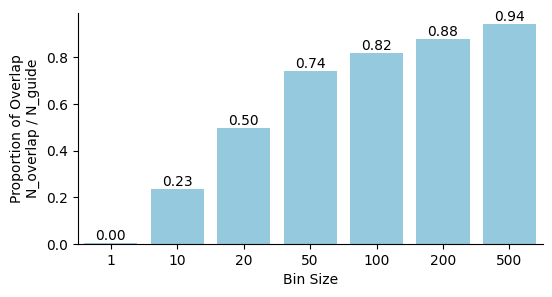

In [10]:
join_df = pd.concat([gem_df.groupby(['x', 'y'])['MIDCount'].sum(), mag_df.groupby(['x', 'y'])['MIDCount'].sum()], axis=1).fillna(0)
join_df.columns = ['gem', 'mag']
join_df.reset_index(inplace=True)

bin1 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin10', 'y_bin10']] = join_df[['x', 'y']] // 10 * 10
join_df = join_df.groupby(['x_bin10', 'y_bin10']).sum()
bin10 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin20', 'y_bin20']] = join_df[['x', 'y']] // 20 * 20
join_df = join_df.groupby(['x_bin20', 'y_bin20']).sum()
bin20 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin50', 'y_bin50']] = join_df[['x', 'y']] // 50 * 50
join_df = join_df.groupby(['x_bin50', 'y_bin50']).sum()
bin50 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin100', 'y_bin100']] = join_df[['x', 'y']] // 100 * 100
join_df = join_df.groupby(['x_bin100', 'y_bin100']).sum()
bin100 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin200', 'y_bin200']] = join_df[['x', 'y']] // 200 * 200
join_df = join_df.groupby(['x_bin200', 'y_bin200']).sum()
bin200 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin500', 'y_bin500']] = join_df[['x', 'y']] // 500 * 500
join_df = join_df.groupby(['x_bin500', 'y_bin500']).sum()
bin500 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
plt.figure(figsize=(6, 3))
sns.barplot([bin1, bin10, bin20, bin50, bin100, bin200, bin500], color='skyblue')

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['1', '10', '20', '50', '100', '200', '500'])
for i, v in enumerate([bin1, bin10, bin20, bin50, bin100, bin200, bin500]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

sns.despine()
plt.xlabel('Bin Size')
plt.ylabel('Proportion of Overlap\nN_overlap / N_guide')

plt.rcParams['pdf.fonttype']=42
plt.savefig("../20240502-SPACseq/plots/tumor_signature_overlap.pdf", format="pdf", bbox_inches='tight')
plt.show()


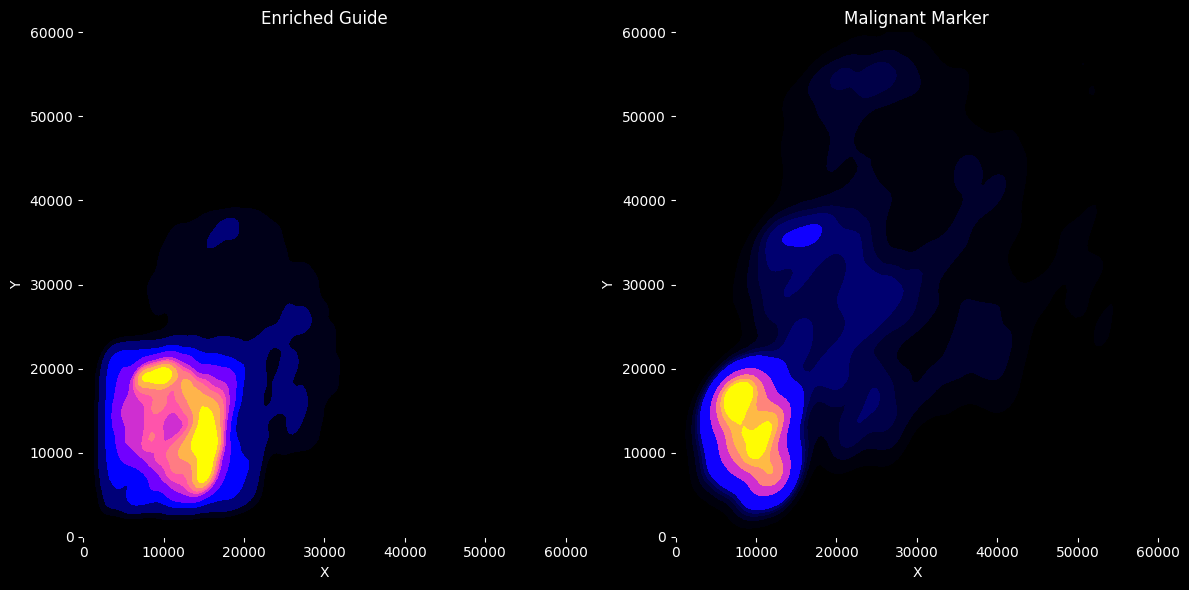

In [33]:
join_df = pd.concat([gem_df.groupby(['x', 'y'])['MIDCount'].sum(), mag_df.groupby(['x', 'y'])['MIDCount'].sum()], axis=1).fillna(0)
join_df.columns = ['gem', 'mag']
join_df.reset_index(inplace=True)

bin1 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin10', 'y_bin10']] = join_df[['x', 'y']] // 10 * 10
join_df = join_df.groupby(['x_bin10', 'y_bin10']).sum()
bin10 = join_df.loc[(join_df['mag'] > 0) & (join_df['gem'] > 0), :].mag.count() / join_df.loc[(join_df['gem'] > 0), :].mag.count()
join_df[['x_bin20', 'y_bin20']] = join_df[['x', 'y']] // 20 * 20
join_df = join_df.groupby(['x_bin20', 'y_bin20']).sum()

join_df.reset_index(inplace=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')

plot_data = join_df.loc[(join_df['gem'] > 0), :]
sns.kdeplot(plot_data, x='x_bin20', y='y_bin20', weights=1, fill=True, levels=10, cmap='gnuplot2', ax=ax1, bw_adjust=0.6, alpha=1)
ax1.set_title('Enriched Guide', color='white')  # 更新标题并设置颜色为白色
ax1.set_xlim(0, 60000)
ax1.set_ylim(0, 60000)

plot_data = join_df.loc[(join_df['mag'] > 5), :]
sns.kdeplot(plot_data, x='x_bin20', y='y_bin20', weights=1, fill=True, levels=10, cmap='gnuplot2', ax=ax2, bw_adjust=0.6, alpha=1)
ax2.set_title('Malignant Marker', color='white')  # 更新标题并设置颜色为白色
ax2.set_xlim(0, 60000)
ax2.set_ylim(0, 60000)

for ax in [ax1, ax2]:
    ax.set_facecolor('black')
    sns.despine(ax=ax)
    ax.set_xlabel('X', color='white')  # 设置坐标轴标签颜色为白色
    ax.set_ylabel('Y', color='white')  # 设置坐标轴标签颜色为白色
    ax.tick_params(axis='x', colors='white')  # 设置x轴刻度颜色为白色
    ax.tick_params(axis='y', colors='white')  # 设置y轴刻度颜色为白色

plt.tight_layout()
plt.show()

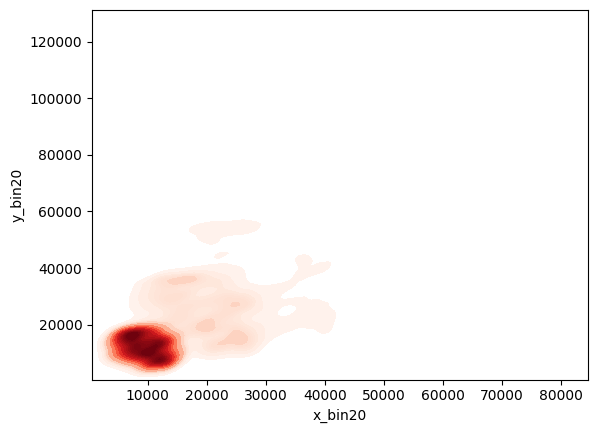

In [25]:
plot_data = join_df.loc[(join_df['mag'] > 0), :]

sns.kdeplot(plot_data, x='x_bin20', y='y_bin20', weights='mag', fill=True, levels=20, cmap='Reds')
plt.show()

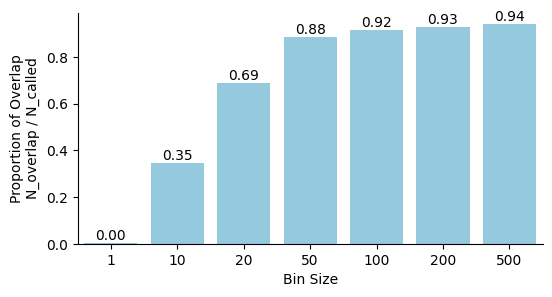

In [83]:
join_df = pd.concat([call_df.groupby(['x', 'y'])['MIDCount'].sum(), mag_df.groupby(['x', 'y'])['MIDCount'].sum()], axis=1).fillna(0)
join_df.columns = ['call', 'mag']
join_df.reset_index(inplace=True)

bin1 = join_df.loc[(join_df['mag'] > 0) & (join_df['call'] > 0), :].mag.count() / join_df.loc[(join_df['call'] > 0), :].mag.count()
join_df[['x_bin10', 'y_bin10']] = join_df[['x', 'y']] // 10 * 10
join_df = join_df.groupby(['x_bin10', 'y_bin10']).sum()
bin10 = join_df.loc[(join_df['mag'] > 0) & (join_df['call'] > 0), :].mag.count() / join_df.loc[(join_df['call'] > 0), :].mag.count()
join_df[['x_bin20', 'y_bin20']] = join_df[['x', 'y']] // 20 * 20
join_df = join_df.groupby(['x_bin20', 'y_bin20']).sum()
bin20 = join_df.loc[(join_df['mag'] > 0) & (join_df['call'] > 0), :].mag.count() / join_df.loc[(join_df['call'] > 0), :].mag.count()
join_df[['x_bin50', 'y_bin50']] = join_df[['x', 'y']] // 50 * 50
join_df = join_df.groupby(['x_bin50', 'y_bin50']).sum()
bin50 = join_df.loc[(join_df['mag'] > 0) & (join_df['call'] > 0), :].mag.count() / join_df.loc[(join_df['call'] > 0), :].mag.count()
join_df[['x_bin100', 'y_bin100']] = join_df[['x', 'y']] // 100 * 100
join_df = join_df.groupby(['x_bin100', 'y_bin100']).sum()
bin100 = join_df.loc[(join_df['mag'] > 0) & (join_df['call'] > 0), :].mag.count() / join_df.loc[(join_df['call'] > 0), :].mag.count()
join_df[['x_bin200', 'y_bin200']] = join_df[['x', 'y']] // 200 * 200
join_df = join_df.groupby(['x_bin200', 'y_bin200']).sum()
bin200 = join_df.loc[(join_df['mag'] > 0) & (join_df['call'] > 0), :].mag.count() / join_df.loc[(join_df['call'] > 0), :].mag.count()
join_df[['x_bin500', 'y_bin500']] = join_df[['x', 'y']] // 500 * 500
join_df = join_df.groupby(['x_bin500', 'y_bin500']).sum()
bin500 = join_df.loc[(join_df['mag'] > 0) & (join_df['call'] > 0), :].mag.count() / join_df.loc[(join_df['call'] > 0), :].mag.count()
plt.figure(figsize=(6, 3))
sns.barplot([bin1, bin10, bin20, bin50, bin100, bin200, bin500], color='skyblue')

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['1', '10', '20', '50', '100', '200', '500'])
for i, v in enumerate([bin1, bin10, bin20, bin50, bin100, bin200, bin500]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

sns.despine()
plt.xlabel('Bin Size')
plt.ylabel('Proportion of Overlap\nN_overlap / N_called')
plt.show()

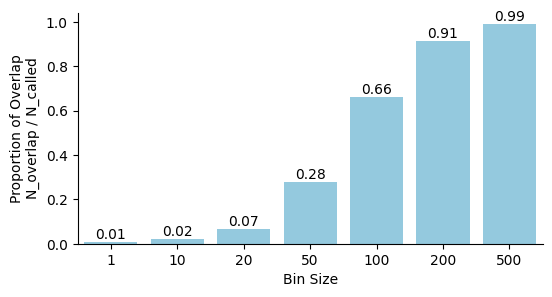

In [84]:
join_df = pd.concat([call_df.groupby(['x', 'y'])['MIDCount'].sum(), gem_df.groupby(['x', 'y'])['MIDCount'].sum()], axis=1).fillna(0)
join_df.columns = ['call', 'gem']
join_df.reset_index(inplace=True)

bin1 = join_df.loc[(join_df['gem'] > 0) & (join_df['call'] > 0), :].gem.count() / join_df.loc[(join_df['call'] > 0), :].gem.count()
join_df[['x_bin10', 'y_bin10']] = join_df[['x', 'y']] // 10 * 10
join_df = join_df.groupby(['x_bin10', 'y_bin10']).sum()
bin10 = join_df.loc[(join_df['gem'] > 0) & (join_df['call'] > 0), :].gem.count() / join_df.loc[(join_df['call'] > 0), :].gem.count()
join_df[['x_bin20', 'y_bin20']] = join_df[['x', 'y']] // 20 * 20
join_df = join_df.groupby(['x_bin20', 'y_bin20']).sum()
bin20 = join_df.loc[(join_df['gem'] > 0) & (join_df['call'] > 0), :].gem.count() / join_df.loc[(join_df['call'] > 0), :].gem.count()
join_df[['x_bin50', 'y_bin50']] = join_df[['x', 'y']] // 50 * 50
join_df = join_df.groupby(['x_bin50', 'y_bin50']).sum()
bin50 = join_df.loc[(join_df['gem'] > 0) & (join_df['call'] > 0), :].gem.count() / join_df.loc[(join_df['call'] > 0), :].gem.count()
join_df[['x_bin100', 'y_bin100']] = join_df[['x', 'y']] // 100 * 100
join_df = join_df.groupby(['x_bin100', 'y_bin100']).sum()
bin100 = join_df.loc[(join_df['gem'] > 0) & (join_df['call'] > 0), :].gem.count() / join_df.loc[(join_df['call'] > 0), :].gem.count()
join_df[['x_bin200', 'y_bin200']] = join_df[['x', 'y']] // 200 * 200
join_df = join_df.groupby(['x_bin200', 'y_bin200']).sum()
bin200 = join_df.loc[(join_df['gem'] > 0) & (join_df['call'] > 0), :].gem.count() / join_df.loc[(join_df['call'] > 0), :].gem.count()
join_df[['x_bin500', 'y_bin500']] = join_df[['x', 'y']] // 500 * 500
join_df = join_df.groupby(['x_bin500', 'y_bin500']).sum()
bin500 = join_df.loc[(join_df['gem'] > 0) & (join_df['call'] > 0), :].gem.count() / join_df.loc[(join_df['call'] > 0), :].gem.count()
plt.figure(figsize=(6, 3))
sns.barplot([bin1, bin10, bin20, bin50, bin100, bin200, bin500], color='skyblue')

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['1', '10', '20', '50', '100', '200', '500'])
for i, v in enumerate([bin1, bin10, bin20, bin50, bin100, bin200, bin500]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

sns.despine()
plt.xlabel('Bin Size')
plt.ylabel('Proportion of Overlap\nN_overlap / N_called')
plt.show()